# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

pd.set_option('display.float_format', '{:,.2f}'.format)

In [157]:
df = pd.read_csv("data/exams.csv")
df.columns = ['gender', 'race', 'parent_education_level', 'lunch', 'test_prep_course', 'math', 'reading', 'writing']
df.head()

,gender,race,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [158]:
df['total'] = df['math'] + df['reading'] + df['writing']

# Q1. What are the average reading scores for students with/without the test preparation course?

In [159]:
average_scores_test_prep = df.groupby("test_prep_course")['reading'].mean().reset_index()
average_scores_test_prep.columns = ['test_prep', 'avg_reading_score']
average_scores_test_prep

,test_prep,avg_reading_score
0,completed,73.89
1,none,66.53


# Q2. What are the average scores for the different parental education levels?

In [160]:
average_score_parents = df.groupby("parent_education_level")[['math','reading','writing']].mean().reset_index()
average_score_parents.columns = ['parent_background', 'avg_math', 'avg_reading', 'avg_writing']
average_score_parents_melt = pd.melt(average_score_parents, id_vars = 'parent_background', value_vars = ['avg_math', 'avg_reading', 'avg_writing'])
average_score_parents_melt.columns = ['parent_background', 'subject', 'score']
average_score_parents

,parent_background,avg_math,avg_reading,avg_writing
0,associate's degree,67.88,70.93,69.90
1,bachelor's degree,69.39,73.00,73.38
2,high school,62.14,64.70,62.45
3,master's degree,69.75,75.37,75.68
4,some college,67.13,69.46,68.84
5,some high school,63.50,66.94,64.89


In [161]:
average_score_parents['avg'] = average_score_parents.mean(axis = 1)
average_score_parents = average_score_parents.sort_values(by = 'avg', ascending = True)
sorted_categories = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_83696/1989152714.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_score_parents['avg'] = average_score_parents.mean(axis = 1)


# Q3. Create plots to visualize findings for questions 1 and 2.

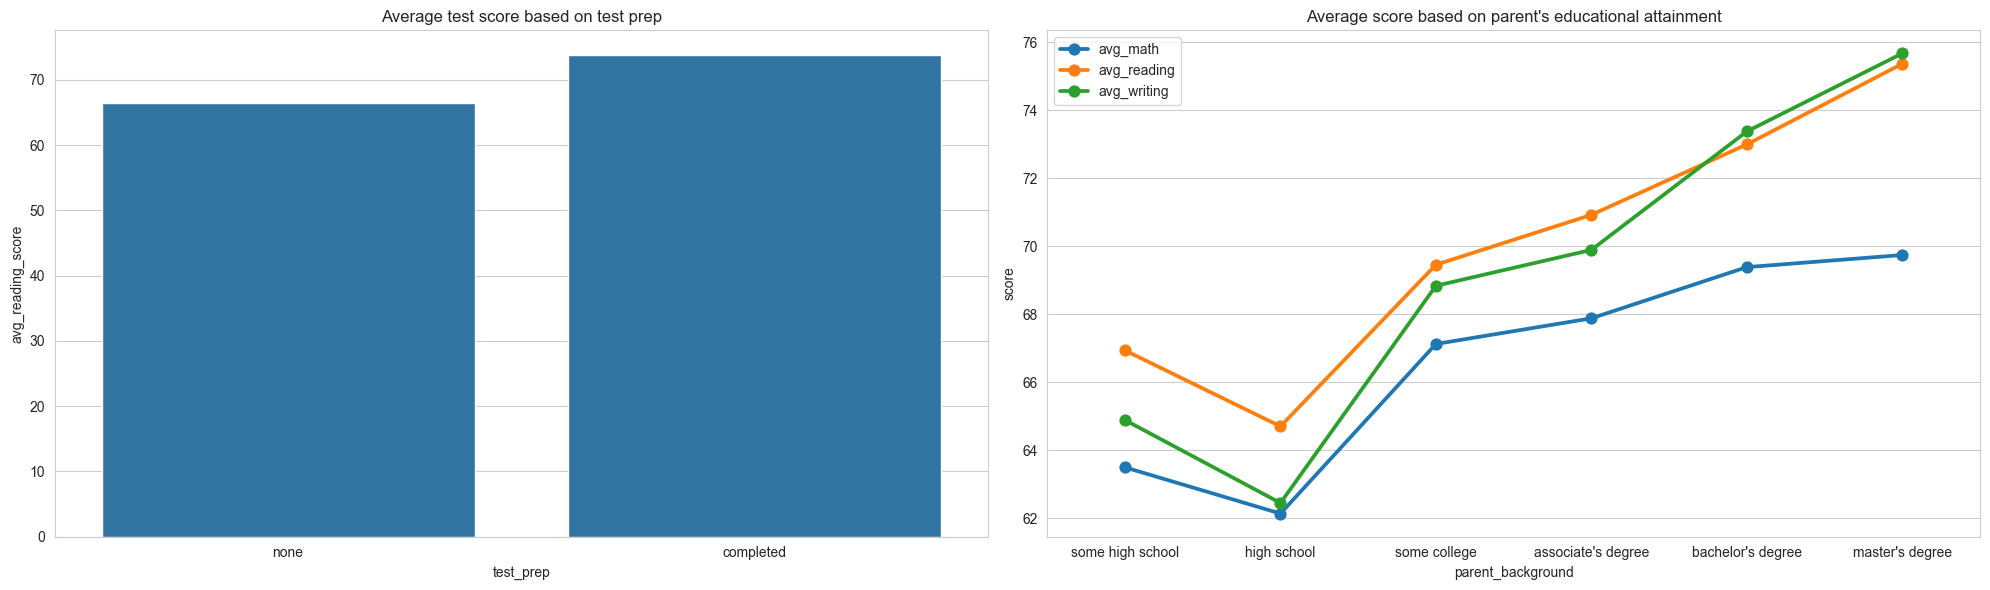

In [162]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))

sns.barplot(data = average_scores_test_prep, x = 'test_prep', y = 'avg_reading_score', ax = axs[0], order = ['none', 'completed'])
sns.pointplot(data = average_score_parents_melt, x = 'parent_background', y = 'score', ax = axs[1], hue = 'subject', errorbar=('ci', 95), order = sorted_categories)

axs[0].set_title("Average test score based on test prep")
axs[1].set_title("Average score based on parent's educational attainment")

plt.legend(loc = 'upper left')
plt.tight_layout()

# Q4. Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

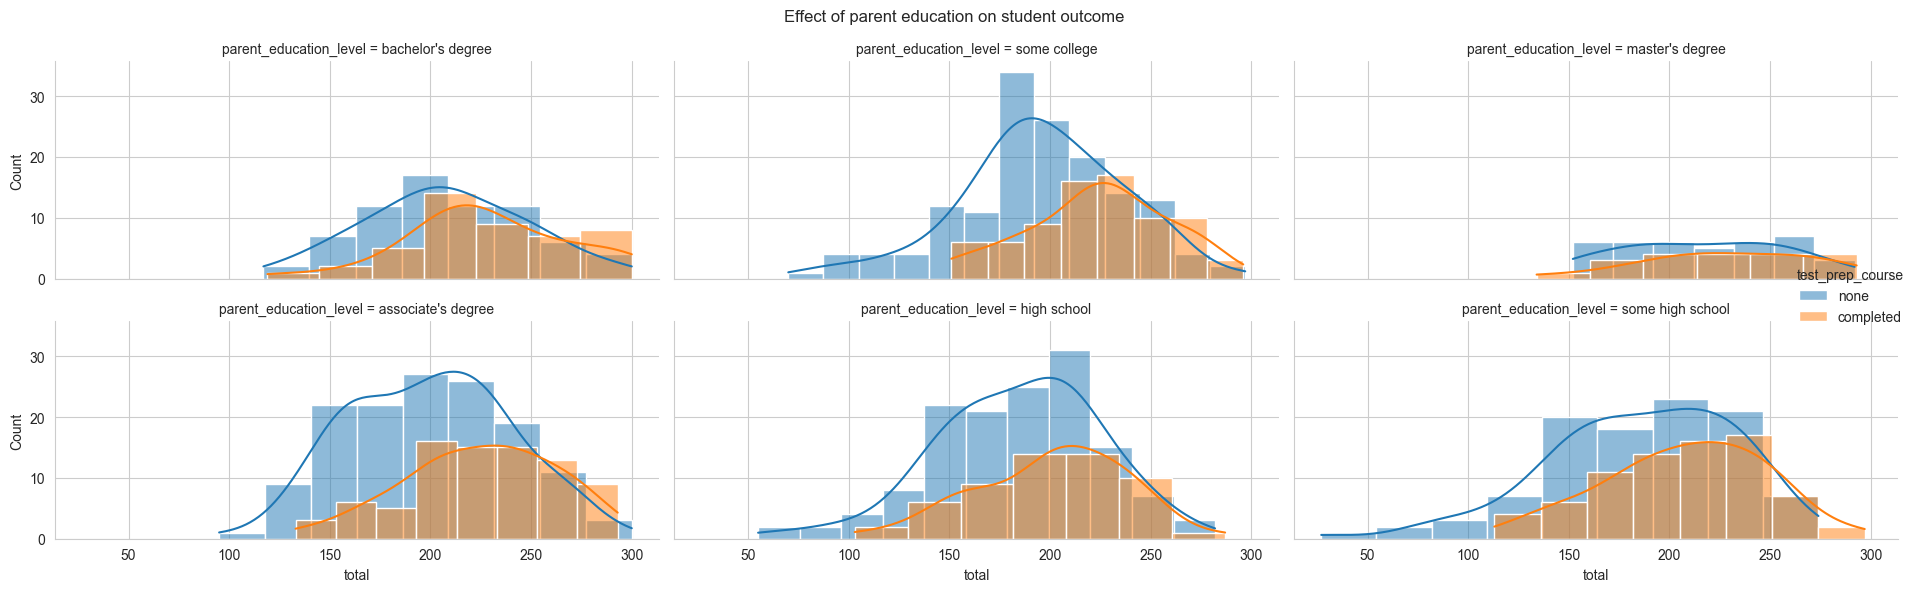

In [163]:
g = sns.FacetGrid(df, 
                  col = 'parent_education_level', 
                  col_wrap = 3, 
                  hue='test_prep_course',                  
                  aspect = 2,
                  height = 3,
                  legend_out=True
                 )

g.map(sns.histplot, 'total', kde = True)
g.fig.suptitle("Effect of parent education on student outcome")
g.add_legend()
plt.tight_layout()

In [186]:
summary = df.groupby(['parent_education_level', 'test_prep_course']).agg({'total': ['count', 'mean', 'median', 'std', 'max', 'min']}).reset_index()
summary.columns = list(map('_'.join, summary.columns))
summary['range'] = summary['total_max'] - summary['total_min']
summary.columns = ['parent_education_level', 'test_prep_course', 'count', 'mean', 'median', 'std', 'max', 'min', 'range']
summary.sort_values(by = 'mean', ascending = False)

,parent_education_level,test_prep_course,count,mean,median,std,max,min,range
6,master's degree,completed,20,228.95,229.00,41.46,293,134,159
2,bachelor's degree,completed,46,228.72,224.50,40.47,300,119,181
0,associate's degree,completed,82,224.82,229.00,37.15,293,133,160
8,some college,completed,77,223.96,226.00,34.86,296,151,145
7,master's degree,none,39,216.62,219.00,40.36,292,152,140
10,some high school,completed,77,208.01,214.00,39.90,297,113,184
3,bachelor's degree,none,72,207.50,206.50,40.85,300,117,183
4,high school,completed,56,200.89,204.50,37.26,287,103,184
1,associate's degree,none,140,199.27,199.50,40.34,300,95,205
9,some college,none,149,195.85,195.00,40.95,297,70,227


# Q5. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

## Correlation heatmap

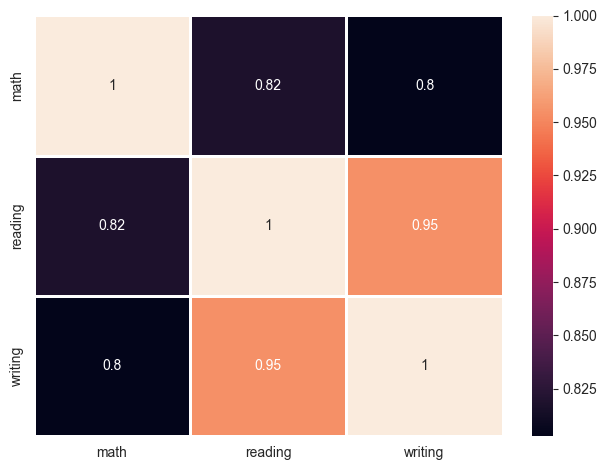

In [166]:
sns.heatmap(df[['math', 'reading', 'writing']].corr(), annot = True, linewidth = 2)
plt.tight_layout()

## Test Outcome Segregated by Gender

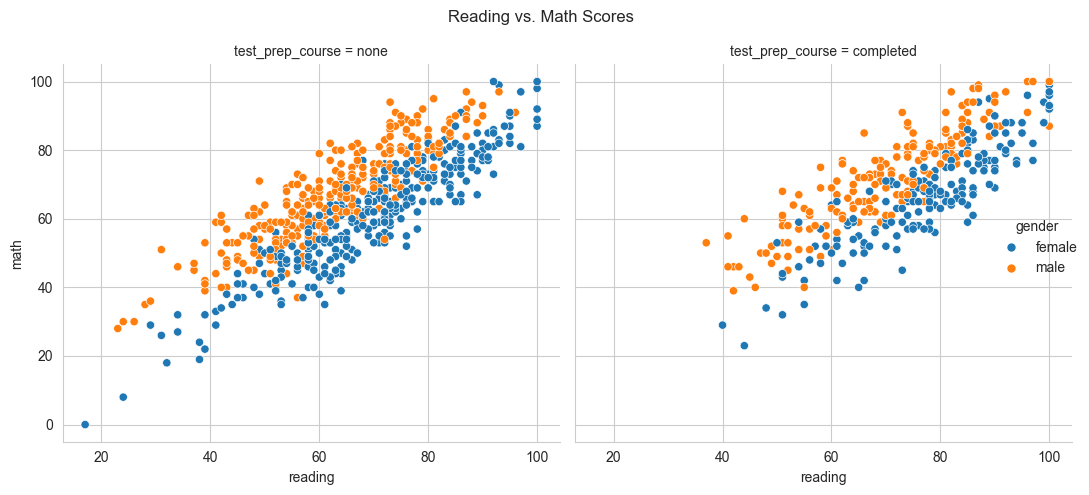

In [167]:
g = sns.relplot(data = df, x = 'reading', y = 'math', col = 'test_prep_course', hue = 'gender', hue_order=['female', 'male'])
g.fig.suptitle("Reading vs. Math Scores")
plt.tight_layout()

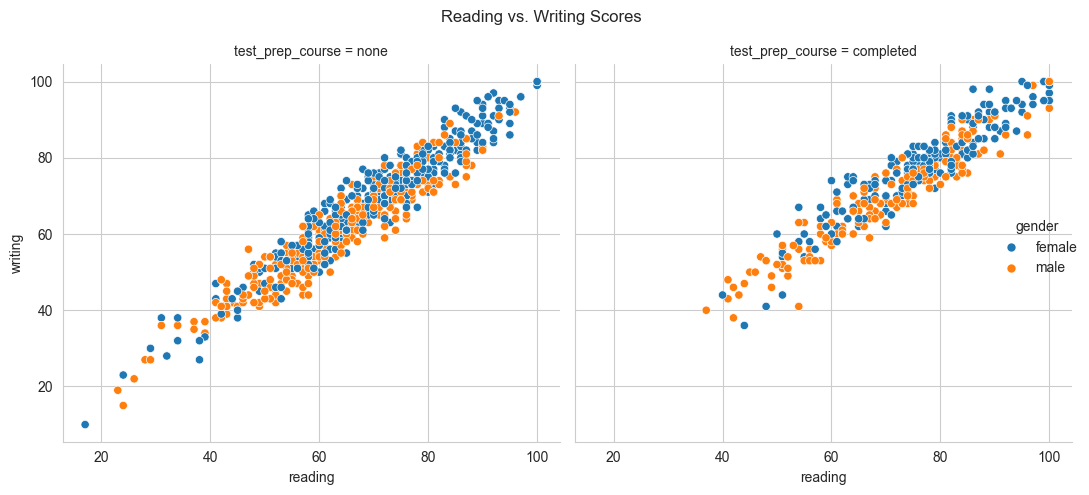

In [168]:
g = sns.relplot(data = df, x = 'reading', y = 'writing', col = 'test_prep_course', hue = 'gender', hue_order=['female', 'male'])
g.fig.suptitle("Reading vs. Writing Scores")

plt.tight_layout()

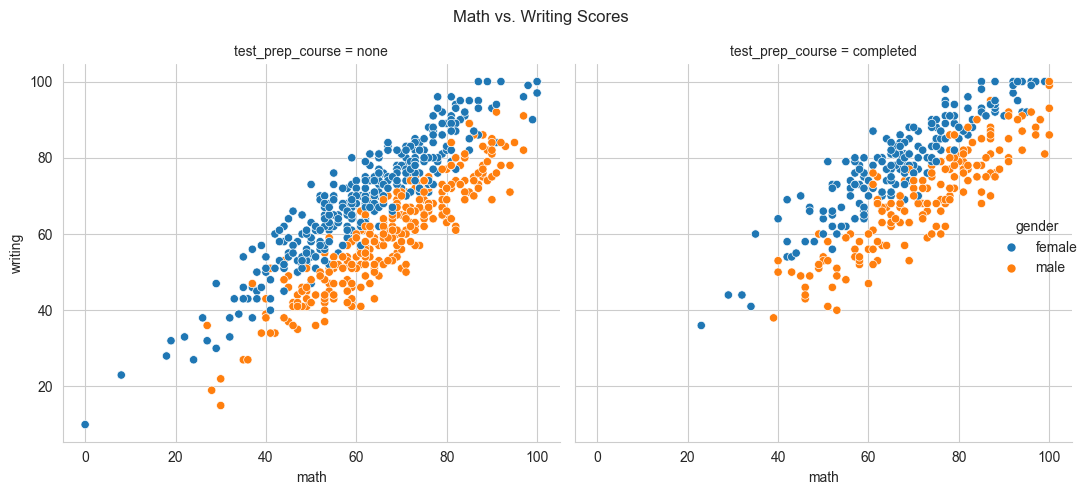

In [169]:
g = sns.relplot(data = df, x = 'math', y = 'writing', col = 'test_prep_course', hue = 'gender', hue_order=['female', 'male'])
g.fig.suptitle("Math vs. Writing Scores")

plt.tight_layout()